# Imports and file loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

In [3]:
path = "/content/drive/MyDrive/SCORE - VR vision/Results"
slotsDf = pd.read_csv(os.path.join(path, "clean-data/slots.csv"))
participantsDf = pd.read_csv(os.path.join(path, "clean-data/participants.csv"))
focusTimesDf = pd.read_csv(os.path.join(path, "clean-data/focusTimes.csv"))
expDf = pd.read_csv(os.path.join(path, "clean-data/experiments.csv"))
streakDf = pd.read_csv(os.path.join(path, "computed-data/scores.csv"))

In [4]:
scoresDf = pd.merge(streakDf, expDf, on=['participantId','device','datasetId'])

In [5]:
order =[]
for i in scoresDf['experimentOrder']:
  if (i ==1) | (i==3):
    order.append(1)
  else:
    order.append(2)
scoresDf['sequenceOrder']=order

In [6]:
scoreSurveyDf = (scoresDf
  .set_index("participantId")
  .join(
      participantsDf
      .set_index("participantId")
  ))

In [7]:
sns.set_context("poster", 0.7)
sns.set_theme(style="whitegrid")

In [ ]:
scoreSurveyDf.columns

Index(['device', 'datasetId', 'nbTrue', 'trueProp', 'maxTrueStreak',
       'maxTrueStreakBoth', 'maxFalseStreakBoth', 'veracityScore', 'levenDist',
       'pauseTime', 'sortingTime', 'time', 'experimentOrder', 'sequenceOrder',
       'colorBlind', 'contraindication', 'DidVr', 'lastTimeVr', 'timeVr',
       'interaction', 'activityVr', 'expectedImpactVr', 'experienceBio',
       'expericenceMicro', 'timeComp', 'Did3dSoft', 'time3dSoft', 'type3dSoft',
       'TimestampStart', 'TimestampEnd', 'moveVr', 'moveComp', 'manipVr',
       'manipComp', 'concentratedVr', 'concentratedComp', 'whichEasier',
       'language'],
      dtype='object')

# Testing how the background of the participants

In [10]:
participantsDf["timeVr"].value_counts()

less than 1h in your life    10
less than 5h in your life     7
less than 3h per month        1
less than 6h per week         1
Name: timeVr, dtype: int64

In [12]:
100 * 2/19

10.526315789473685

In [11]:
participantsDf["lastTimeVr"].value_counts()

Less than 3 years      6
Less than one year     6
More than 3 years      4
Less than one month    2
Less than one week     1
Name: lastTimeVr, dtype: int64

In [ ]:
scoreSurveyDf[scoreSurveyDf["time3dSoft"]=="less than 6h per week"]

,device,datasetId,nbTrue,trueProp,maxTrueStreak,maxTrueStreakBoth,maxFalseStreakBoth,veracityScore,levenDist,pauseTime,...,TimestampStart,TimestampEnd,moveVr,moveComp,manipVr,manipComp,concentratedVr,concentratedComp,whichEasier,language
participantId,,,,,,,,,,,,,,,,,,,,,
25,Comp,1,5,0.714286,2,2,1,0.551020,5,34.849247,...,NaN,2022/05/02 3:43:52 PM GMT+2,4.0,4.0,4.0,4.0,4.0,4.0,2.0,fra
25,Comp,2,4,0.571429,2,2,1,0.428571,5,76.948601,...,NaN,2022/05/02 3:43:52 PM GMT+2,4.0,4.0,4.0,4.0,4.0,4.0,2.0,fra
25,VR,2,5,0.714286,1,1,1,0.387755,7,112.902702,...,NaN,2022/05/02 3:43:52 PM GMT+2,4.0,4.0,4.0,4.0,4.0,4.0,2.0,fra
25,VR,1,3,0.428571,1,1,2,0.387755,5,95.865211,...,NaN,2022/05/02 3:43:52 PM GMT+2,4.0,4.0,4.0,4.0,4.0,4.0,2.0,fra


[Text(0.5, 1.0, 'Results of the experiments vs experience of the participant with VR')]

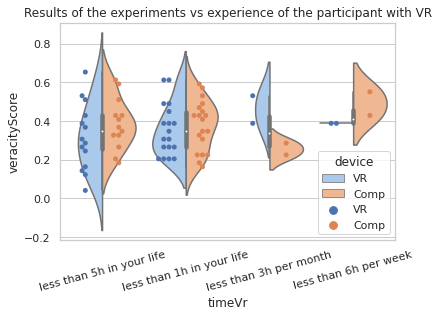

In [ ]:
ax = sns.violinplot(data=scoreSurveyDf,x="timeVr",y="veracityScore",hue="device",split=True,palette="pastel")
ax = sns.swarmplot(data=scoreSurveyDf,x="timeVr",y="veracityScore",hue="device",dodge=True)
plt.xticks(rotation=15)

ax.set(title='Results of the experiments vs experience of the participant with VR')

[<matplotlib.collections.PolyCollection object at 0x7f1d68ad6890>, <matplotlib.collections.PolyCollection object at 0x7f1d68a61190>, <matplotlib.collections.PathCollection object at 0x7f1d68a61f90>, <matplotlib.collections.PolyCollection object at 0x7f1d68a6a490>, <matplotlib.collections.PolyCollection object at 0x7f1d68a618d0>, <matplotlib.collections.PathCollection object at 0x7f1d68a765d0>, <matplotlib.collections.PolyCollection object at 0x7f1d68a76990>, <matplotlib.collections.PolyCollection object at 0x7f1d68a61e50>, <matplotlib.collections.PathCollection object at 0x7f1d68a81ad0>, <matplotlib.collections.PolyCollection object at 0x7f1d68a8b410>, <matplotlib.collections.PathCollection object at 0x7f1d68a93190>, <matplotlib.collections.PathCollection object at 0x7f1d6b7da710>, <matplotlib.collections.PathCollection object at 0x7f1d68a1ef90>, <matplotlib.collections.PathCollection object at 0x7f1d68a24550>, <matplotlib.collections.PathCollection object at 0x7f1d6b772f50>, <matplotl

[Text(0.5, 1.0, 'Results of the experiments vs experience of the participant with 3d softwares')]

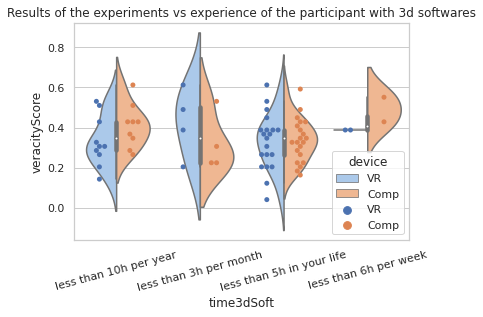

In [ ]:
ax = sns.violinplot(data=scoreSurveyDf,x="time3dSoft",y="veracityScore",hue="device",split=True,palette="pastel")
ax = sns.swarmplot(data=scoreSurveyDf,x="time3dSoft",y="veracityScore",hue="device",dodge=True)
print(ax.collections)
plt.xticks(rotation=15)

ax.set(title='Results of the experiments vs experience of the participant with 3d softwares')

----------------------

[Text(0.5, 1.0, 'Veracity scores of participants along the experiments')]

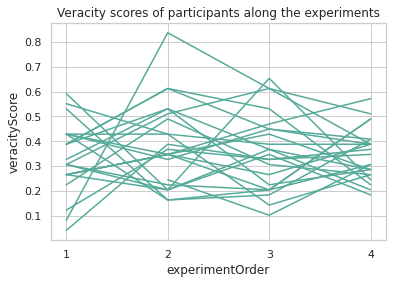

In [ ]:
g = sns.lineplot(
    data=scoreSurveyDf.reset_index(),
    x="experimentOrder",
    y="veracityScore",
    hue="participantId",
    palette = sns.color_palette("blend:#5A9,#5A9", as_cmap=True)
    )
plt.legend([],[], frameon=False)

g.set_xticks(range(1,5))

g.set(title='Veracity scores of participants along the experiments')

------------------------------

In [ ]:
scoresDf.pivot(index=["participantId","datasetId"], columns="device", values="veracityScore").reset_index()

device,participantId,datasetId,Comp,VR
0,1,1,0.612245,0.510204
1,1,2,0.510204,0.306122
2,2,1,NaN,0.836735
3,2,2,0.387755,0.081633
4,3,1,0.530612,0.612245
5,3,2,0.224490,0.387755
6,4,2,0.591837,NaN
7,5,1,0.204082,0.367347
8,5,2,0.306122,0.204082
9,6,1,0.428571,0.265306


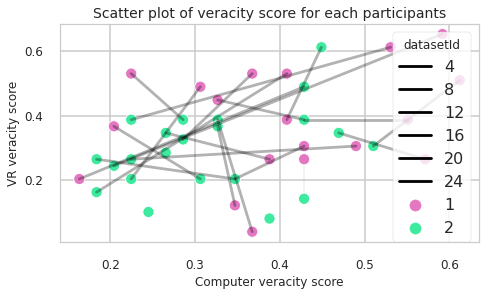

In [ ]:
sns.set_context("poster", 0.7)
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-poster')

matplotlib.rc('axes', titlesize=14)
plt.figure(figsize = (7.5,4))

ax1 = sns.lineplot(
    data = scoresDf.pivot(index=["participantId","datasetId"], columns="device", values="veracityScore").reset_index(),
    x= "Comp",y="VR", hue="participantId",
    palette = sns.color_palette("blend:#000000,#000000", as_cmap=True),
    alpha=0.3)

for line in ax1.lines :
  line.set_linestyle("-")

ax1.get_legend().remove()

ax2 = sns.scatterplot(
    data = scoresDf.pivot(index=["participantId","datasetId"], columns="device", values="veracityScore").reset_index(),
    x= "Comp",y="VR",hue="datasetId",palette=['#e377c2','#3eea9f'])

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(12)

ax1.set(title="Scatter plot of veracity score for each participants")
ax1.set_xlabel("Computer veracity score",fontsize=12)
ax1.set_ylabel("VR veracity score",fontsize=12)

plt.savefig(os.path.join(path,"plot/scatterplot-VR-Comp-by-dataset.svg"))

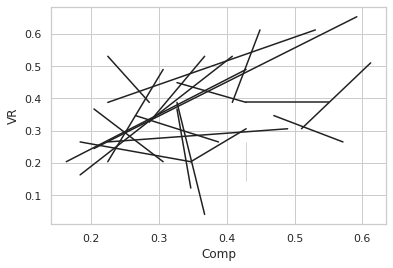

In [ ]:
ax1 = sns.lineplot(
    data = scoresDf.pivot(index=["participantId","datasetId"], columns="device", values="veracityScore").reset_index(),
    x= "Comp",y="VR", hue="participantId",
    palette = sns.color_palette("blend:#212121,#212121", as_cmap=True))
ax1.get_legend().remove()


-------------------------------

In [ ]:
veracityScoresByParticipants = scoreSurveyDf.pivot(columns=["sequenceOrder","device"],values="veracityScore")

In [ ]:
veracityScoresByParticipants["VrMean"] = veracityScoresByParticipants[[(1,"VR"),(2,"VR")]].mean(axis=1)

In [ ]:
veracityScoresByParticipants["CompMean"] = veracityScoresByParticipants[[(1,"Comp"),(2,"Comp")]].mean(axis=1)

In [ ]:
veracityScoresByParticipants["CompVar"] = np.abs(veracityScoresByParticipants[(1,"Comp")] - veracityScoresByParticipants[(2,"Comp")])/2

In [ ]:
veracityScoresByParticipants["VrVar"] = np.abs(veracityScoresByParticipants[(1,"VR")] - veracityScoresByParticipants[(2,"VR")])/2

In [ ]:
veracityScoresByParticipants = veracityScoresByParticipants[~veracityScoresByParticipants.isnull().any(axis=1)]

In [ ]:
veracityScoresByParticipants

sequenceOrder,1,2,1,2,VrMean,CompMean,CompVar,VrVar
device,VR,VR,Comp,Comp,,,,
participantId,,,,,,,,
1,0.306122,0.510204,0.612245,0.510204,0.408163,0.561224,0.051020,0.102041
3,0.387755,0.612245,0.530612,0.224490,0.500000,0.377551,0.153061,0.112245
5,0.367347,0.204082,0.306122,0.204082,0.285714,0.255102,0.051020,0.081633
6,0.142857,0.265306,0.428571,0.428571,0.204082,0.428571,0.000000,0.061224
7,0.265306,0.346939,0.469388,0.571429,0.306122,0.520408,0.051020,0.040816
8,0.448980,0.387755,0.428571,0.326531,0.418367,0.377551,0.051020,0.030612
9,0.204082,0.489796,0.306122,0.224490,0.346939,0.265306,0.040816,0.142857
10,0.040816,0.387755,0.326531,0.367347,0.214286,0.346939,0.020408,0.173469


In [ ]:
import matplotlib

20
(20,)


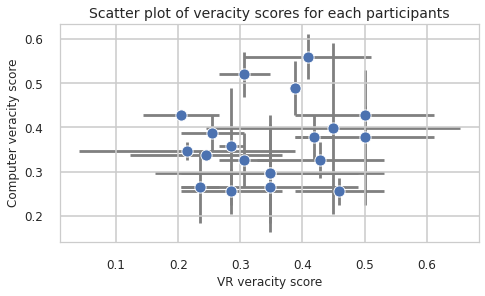

In [ ]:
sns.set_context("poster", 0.7)
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-poster')

matplotlib.rc('axes', titlesize=14)


plt.figure(figsize = (7.5,4))
g = sns.scatterplot(
    data=veracityScoresByParticipants,
    x="VrMean",y="CompMean",palette=['grey'])


# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in g.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
print(len(x_coords))
print(veracityScoresByParticipants["VrVar"].shape)
g.errorbar(x_coords, y_coords,
           yerr=veracityScoresByParticipants["CompVar"],
           xerr=veracityScoresByParticipants["VrVar"],
           fmt=' ', zorder=-1,ecolor = "gray")

for label in (g.get_xticklabels() + g.get_yticklabels()):
	label.set_fontsize(12)

g.set_xlabel("VR veracity score",fontsize=12)
g.set_ylabel("Computer veracity score",fontsize=12)
g.set(title='Scatter plot of veracity scores for each participants')
plt.savefig(os.path.join(path,"plot/scatterplot-VR-Comp-by-participant.svg"))

In [ ]:
stats.pearsonr(veracityScoresByParticipants.dropna()[(2,   'VR')], veracityScoresByParticipants.dropna()[(2, 'Comp')])

(-0.061480769045977844, 0.7968008093573893)

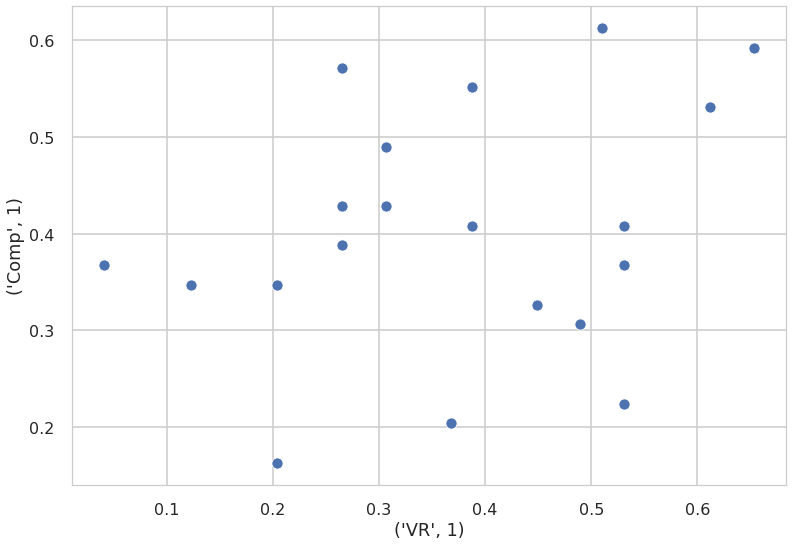

In [ ]:

sns.scatterplot(
    data = scoreSurveyDf.pivot(columns=["device","datasetId"],values="veracityScore"),
    x = ("VR",1),
    y= ("Comp",1))

In [ ]:
myDf = scoreSurveyDf.pivot(columns=["device","datasetId"],values="veracityScore").dropna()


stats.pearsonr(myDf[("Comp",1)],myDf[("VR",1)])

(0.28538670787771786, 0.22258874197403652)

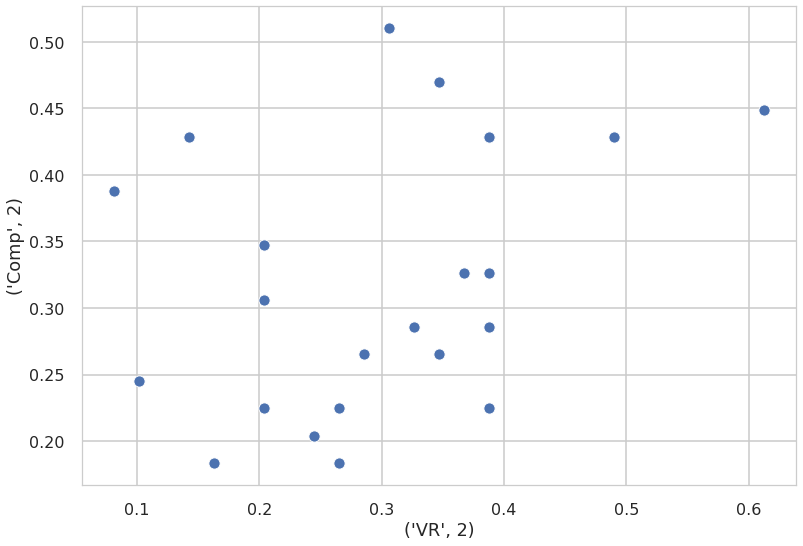

In [ ]:

sns.scatterplot(
    data = scoreSurveyDf.pivot(columns=["device","datasetId"],values="veracityScore"),
    x = ("VR",2),
    y= ("Comp",2))

In [ ]:
myDf = scoreSurveyDf.pivot(columns=["device","datasetId"],values="veracityScore").dropna()

stats.pearsonr(myDf[("Comp",2)],myDf[("VR",2)])

(0.42141715950583036, 0.06423302588447846)

In [ ]:
veracityScoresPerPartiDataset = expDf.pivot(index=["participantId","datasetId"], columns="device",values = "veracityScore").reset_index().dropna()

In [ ]:
veracityScoresPerPartiDataset

device,participantId,datasetId,Comp,VR
0,1,1,0.612245,0.510204
1,1,2,0.510204,0.306122
3,2,2,0.387755,0.081633
4,3,1,0.530612,0.612245
5,3,2,0.224490,0.387755
7,5,1,0.204082,0.367347
8,5,2,0.306122,0.204082
9,6,1,0.428571,0.265306
10,6,2,0.428571,0.142857
11,7,1,0.571429,0.265306


In [ ]:
stats.pearsonr(veracityScoresPerPartiDataset["Comp"],veracityScoresPerPartiDataset["VR"])

(0.37051090493018957, 0.014454887992348658)

In [ ]:
stats.pearsonr(veracityScoresPerPartiDataset.query("datasetId == 2")["Comp"],veracityScoresPerPartiDataset.query("datasetId == 2")["VR"])

(0.35967173886869575, 0.09185683054262007)

In [ ]:
stats.pearsonr(veracityScoresPerPartiDataset.query("datasetId == 1")["Comp"],veracityScoresPerPartiDataset.query("datasetId == 1")["VR"])

(0.28538670787771786, 0.22258874197403652)